In [2]:
import os
import pandas as pd
from pandas import DataFrame

pd.set_option("display.max_columns", 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import chi2_contingency
from scipy.stats import normaltest, shapiro
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

import matplotlib

In [3]:
df = pd.read_csv("../data/Telco_customer_churn.csv")
df.head(4)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved


In [4]:
import pandas as pd
import numpy as np
import datetime

# Generate random start dates within a broader range
np.random.seed(0)
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2024-12-30')  # Ensure this extends past the second price increase date
df['Start_Date'] = start_date + (end_date - start_date) * np.random.rand(len(df))

# Calculate End Dates based on 'Tenure Months'
df['End_Date'] = df['Start_Date'] + pd.to_timedelta(df['Tenure Months'] * 30, unit='D')

# Define the price increase dates
first_increase_date = datetime.datetime(2023, 12, 1)
second_increase_date = datetime.datetime(2024, 11, 1)

# Create binary columns for price increases
df['Price_Increase_Dec_2023'] = df['Start_Date'].apply(lambda x: 1 if x < first_increase_date else 0)
df['Price_Increase_Nov_2024'] = df['Start_Date'].apply(lambda x: 1 if x < second_increase_date else 0)

# Correct the logic for Price_Increase_Nov_2024
df['Price_Increase_Nov_2024'] = df['Start_Date'].apply(lambda x: 1 if first_increase_date <= x < second_increase_date else 0)

# Create tenure after price increase columns
df['Tenure_After_First_Increase'] = ((df['End_Date'] - first_increase_date).dt.days / 30).clip(lower=0)
df['Tenure_After_Second_Increase'] = ((df['End_Date'] - second_increase_date).dt.days / 30).clip(lower=0)

# Display the first few rows to verify
print(df[['CustomerID', 'Start_Date', 'End_Date', 'Price_Increase_Dec_2023', 'Price_Increase_Nov_2024', 'Tenure_After_First_Increase', 'Tenure_After_Second_Increase']].head())

# Verify the value counts
print("Price_Increase_Dec_2023 value counts:")
print(df['Price_Increase_Dec_2023'].value_counts())

print("Price_Increase_Nov_2024 value counts:")
print(df['Price_Increase_Nov_2024'].value_counts())


   CustomerID                    Start_Date                      End_Date   
0  3668-QPYBK 2021-11-03 05:14:38.618964800 2022-01-02 05:14:38.618964800  \
1  9237-HQITU 2023-01-02 07:24:43.005444352 2023-03-03 07:24:43.005444352   
2  9305-CDSKC 2022-03-21 01:27:00.794567536 2022-11-16 01:27:00.794567536   
3  7892-POOKP 2021-10-24 04:14:12.412930976 2024-02-11 04:14:12.412930976   
4  0280-XJGEX 2020-12-18 10:30:44.263661888 2024-12-27 10:30:44.263661888   

   Price_Increase_Dec_2023  Price_Increase_Nov_2024   
0                        1                        0  \
1                        1                        0   
2                        1                        0   
3                        1                        0   
4                        1                        0   

   Tenure_After_First_Increase  Tenure_After_Second_Increase  
0                     0.000000                      0.000000  
1                     0.000000                      0.000000  
2                

In [5]:
df.head(70)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Start_Date,End_Date,Price_Increase_Dec_2023,Price_Increase_Nov_2024,Tenure_After_First_Increase,Tenure_After_Second_Increase
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,2021-11-03 05:14:38.618964800,2022-01-02 05:14:38.618964800,1,0,0.000000,0.000000
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,2023-01-02 07:24:43.005444352,2023-03-03 07:24:43.005444352,1,0,0.000000,0.000000
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,2022-03-21 01:27:00.794567536,2022-11-16 01:27:00.794567536,1,0,0.000000,0.000000
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,2021-10-24 04:14:12.412930976,2024-02-11 04:14:12.412930976,1,0,2.400000,0.000000
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,2020-12-18 10:30:44.263661888,2024-12-27 10:30:44.263661888,1,0,13.066667,1.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,6323-AYBRX,1,United States,California,Ontario,91762,"34.057256, -117.667677",34.057256,-117.667677,Male,No,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes,1,83,5084,Price too high,2020-07-31 02:13:38.873749152,2025-06-05 02:13:38.873749152,1,0,18.400000,7.200000
66,4385-GZQXV,1,United States,California,Ontario,91764,"34.074087, -117.605618",34.074087,-117.605618,Female,Yes,No,No,16,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,1511.2,Yes,1,81,3810,Product dissatisfaction,2023-09-29 15:18:17.475391360,2025-01-21 15:18:17.475391360,1,0,13.900000,2.700000
67,6366-ZGQGL,1,United States,California,Pomona,91766,"34.042286, -117.756106",34.042286,-117.756106,Male,No,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),24.80,24.8,Yes,1,73,5087,Service dissatisfaction,2018-09-06 02:15:00.833869860,2018-10-06 02:15:00.833869860,1,0,0.000000,0.000000
68,5940-AHUHD,1,United States,California,Pomona,91768,"34.067932, -117.785168",34.067932,-117.785168,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70.60,70.6,Yes,1,69,3338,Lack of self-service on Website,2023-11-11 22:46:54.220175968,2023-12-11 22:46:54.220175968,1,0,0.333333,0.000000


In [6]:
def data_quality_report(df):
    # Basic Data Quality Summary
    summary = pd.DataFrame({
        'Feature': df.columns,
        'Non-Null Count': df.count(),
        'Missing (%)': df.isnull().mean() * 100,
        'Mean': df.mean(numeric_only=True),
        'Median': df.median(numeric_only=True),
        'Std Dev': df.std(numeric_only=True),
        'Min': df.min(numeric_only=True),
        'Max': df.max(numeric_only=True)
    })
    return summary
    
# Print Summary Table
print("Data Quality Summary:")
print(data_quality_report(df))

Data Quality Summary:
                                                   Feature  Non-Null Count   
CLTV                                            CustomerID            7043  \
Churn Label                                          Count            7043   
Churn Reason                                       Country            1869   
Churn Score                                          State            7043   
Churn Value                                           City            7043   
City                                              Zip Code            7043   
Contract                                          Lat Long            7043   
Count                                             Latitude            7043   
Country                                          Longitude            7043   
CustomerID                                          Gender            7043   
Dependents                                  Senior Citizen            7043   
Device Protection                         

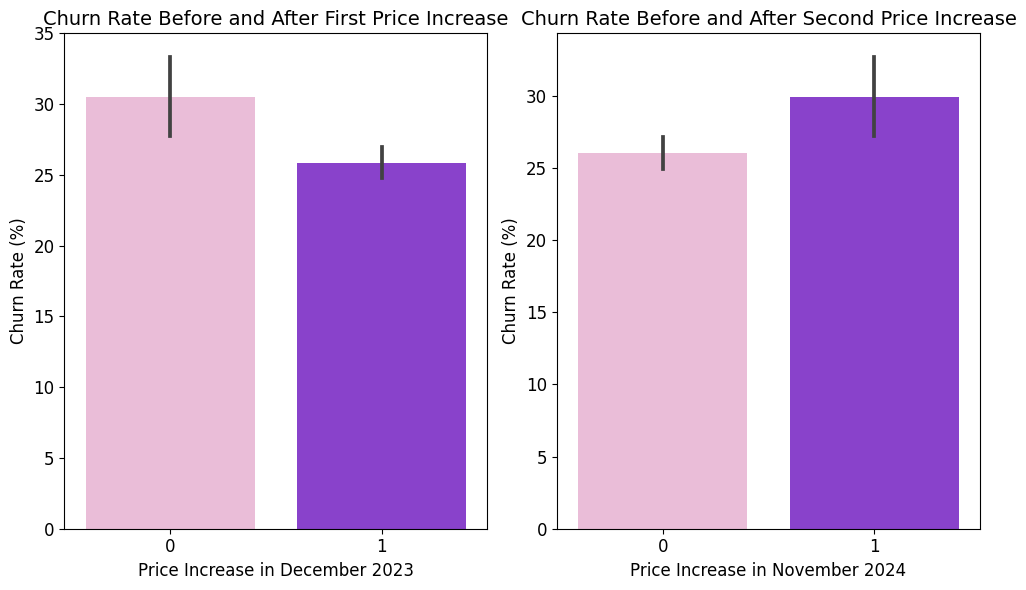

In [37]:
# # Create images directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('../images')

# Keep the default white background
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# Visualize churn rate before and after price increases
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # Adjusting figure size to 10x6

# Custom palette matching slide's color scheme
custom_palette = ['#F1B6DA', '#8A2BE2']  # Light pink and purple

# Churn rate before and after first price increase
sns.barplot(
    data=df, x='Price_Increase_Dec_2023', y='Churn Value', 
    estimator=lambda x: np.sum(x) / len(x) * 100, ax=axes[0], 
    palette=custom_palette
)
axes[0].set_title('Churn Rate Before and After First Price Increase', color='black', fontsize=14)
axes[0].set_xlabel('Price Increase in December 2023', color='black', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', color='black', fontsize=12)

# Churn rate before and after second price increase
sns.barplot(
    data=df, x='Price_Increase_Nov_2024', y='Churn Value', 
    estimator=lambda x: np.sum(x) / len(x) * 100, ax=axes[1], 
    palette=custom_palette
)
axes[1].set_title('Churn Rate Before and After Second Price Increase', color='black', fontsize=14)
axes[1].set_xlabel('Price Increase in November 2024', color='black', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', color='black', fontsize=12)

# Adjust tick label size and color for better readability
for ax in axes:
    ax.tick_params(colors='black', labelsize=12)  # Set tick labels color and size
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

plt.tight_layout()

# Save the figure (optional)
plt.savefig('../images/churn_rate_price_increases.png')

# Show the plot
plt.show()

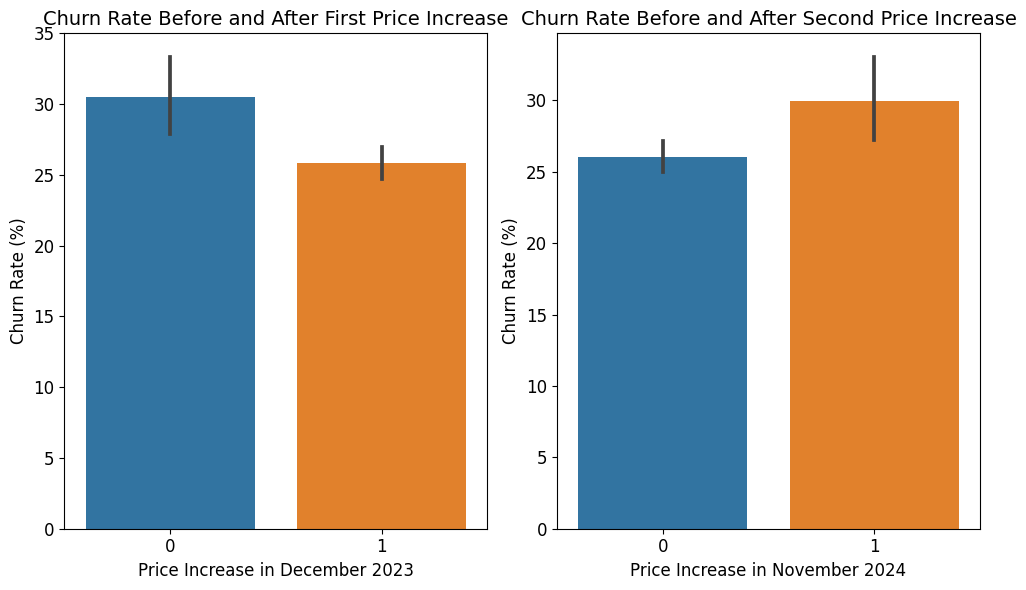

In [7]:
# # Create images directory if it doesn't exist
# if not os.path.exists('images'):
#     os.makedirs('../images')

# Keep the default white background
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# Visualize churn rate before and after price increases
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # Adjusting figure size to 10x6

# Custom palette updated to blue and orange
custom_palette = ['#1f77b4', '#ff7f0e']  # Blue and Orange

# Churn rate before and after first price increase
sns.barplot(
    data=df, x='Price_Increase_Dec_2023', y='Churn Value', 
    estimator=lambda x: np.sum(x) / len(x) * 100, ax=axes[0], 
    palette=custom_palette
)
axes[0].set_title('Churn Rate Before and After First Price Increase', color='black', fontsize=14)
axes[0].set_xlabel('Price Increase in December 2023', color='black', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', color='black', fontsize=12)

# Churn rate before and after second price increase
sns.barplot(
    data=df, x='Price_Increase_Nov_2024', y='Churn Value', 
    estimator=lambda x: np.sum(x) / len(x) * 100, ax=axes[1], 
    palette=custom_palette
)
axes[1].set_title('Churn Rate Before and After Second Price Increase', color='black', fontsize=14)
axes[1].set_xlabel('Price Increase in November 2024', color='black', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', color='black', fontsize=12)

# Adjust tick label size and color for better readability
for ax in axes:
    ax.tick_params(colors='black', labelsize=12)  # Set tick labels color and size
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

plt.tight_layout()

# Save the figure (optional)
plt.savefig('../images/churn_rate_price_increases.png')

# Show the plot
plt.show()


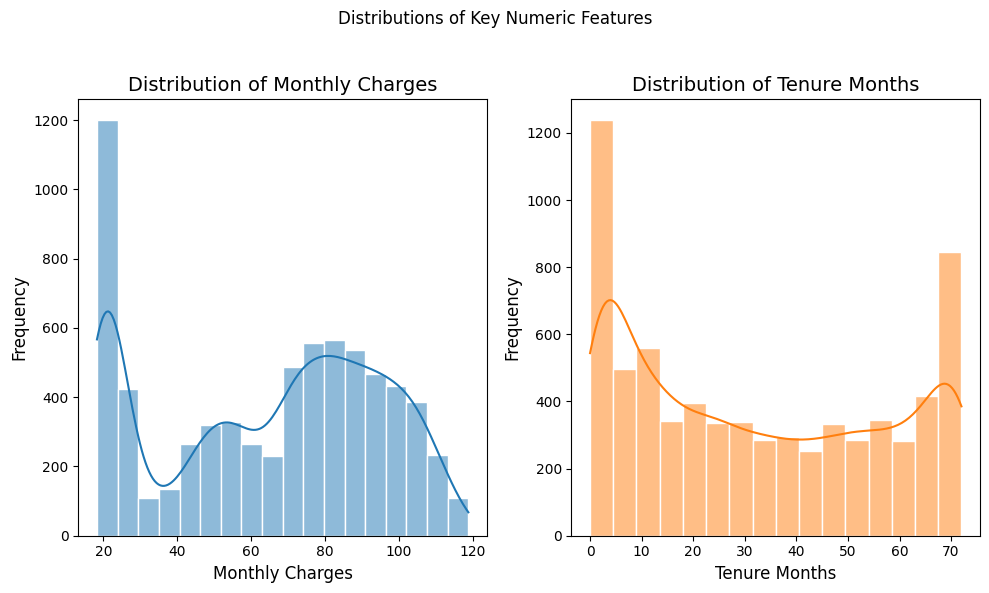

In [12]:
# Select key numeric features to visualize
numeric_features = ['Monthly Charges', 'Tenure Months']

# Keep the default white background
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# Custom color palette to match the slide (light pink and purple)
custom_colors = ['#1f77b4', '#ff7f0e']  # Matching slide colors

# Plot distributions with larger figure size and larger titles/labels
plt.figure(figsize=(10, 6))  # Larger figure size for more prominence
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[feature], kde=True, color=custom_colors[i-1], edgecolor='white')
    plt.title(f'Distribution of {feature}', fontsize=14, color='black')  # Larger title font size
    plt.xlabel(feature, fontsize=12, color='black')  # Larger x-axis label font size
    plt.ylabel('Frequency', fontsize=12, color='black')  # Larger y-axis label font size

# Add main title
plt.suptitle('Distributions of Key Numeric Features', fontsize=12, color='black')  # Larger main title

plt.tight_layout(rect=[0, 0, 1, 0.95])
# Save the figure
plt.savefig('../images/distributions_key_numeric_features.png')


# Show the plot
plt.show()
